# Quadrados Mínimos e Ajustes de Curvas

In [1]:
using Plots
pyplot(size=(600,400))

Plots.PyPlotBackend()

O problema de ajuste de um conjunto de dados à um modelo, simplesmente dito ajuste de curvas, é um problema bastante prático e recorrente.
Esse problema acontece quando temos muito mais informação que o necessário para se determinar exatamente um modelo. Mas isso também só faz sentido se essa informação tiver 
algum tipo de erro experimental ou intrínseco.

Considere o seguinte problema de ajustar um conjunto de pontos por uma reta.

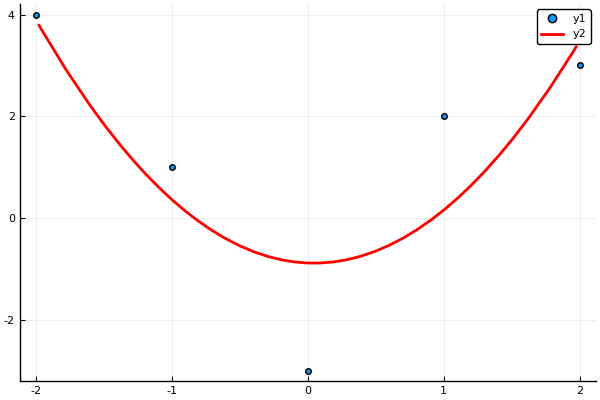

In [2]:
x = [-2, -1, 0, 1, 2.0]
y = [4, 1, -3, 2, 3.0]
scatter(x, y)

β₀, β₁, β₂ = -62/70, -1/10, 80/70
plot!(x -> β₀ + β₁ * x + β₂ * x^2, -2, 2, c=:red, lw=2)

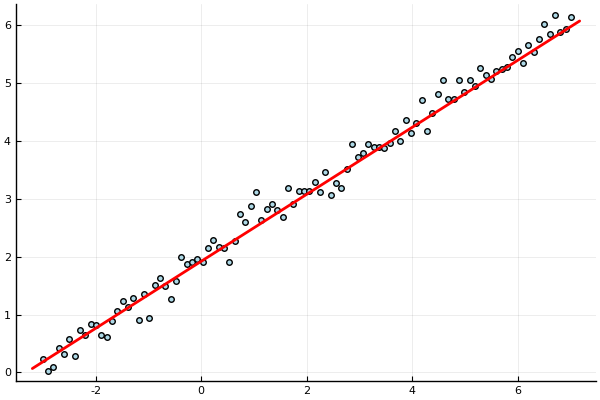

In [3]:
m = 100
x = range(-3, 7, length=m)
y = 1.9 .+ 0.6*x + randn(m)*0.2 # Gerando pontos aleatórios

scatter(x, y, leg=false, c=:lightblue, ms=4)
plot!(x -> 0.58x + 1.92, c=:red, lw=2)

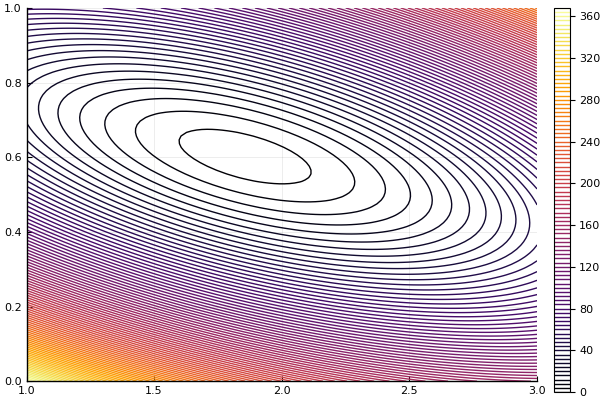

In [4]:
E(α,β) = 0.5 * sum((y[i] - α - β * x[i])^2 for i = 1:m)
contour(range(1, 3, length=100),
        range(0.0, 1.0, length=100),
        E,
        levels = 100)

In [5]:
M11 = m
M12 = M21 = sum(x)
M22 = sum(x.^2)
c1 = sum(y)
c2 = sum(x .* y)

M = [M11 M12; M21 M22]
c = [c1; c2]
αβ = M \ c

α, β = αβ[1], αβ[2]

(1.856206917681771, 0.6017612810916224)

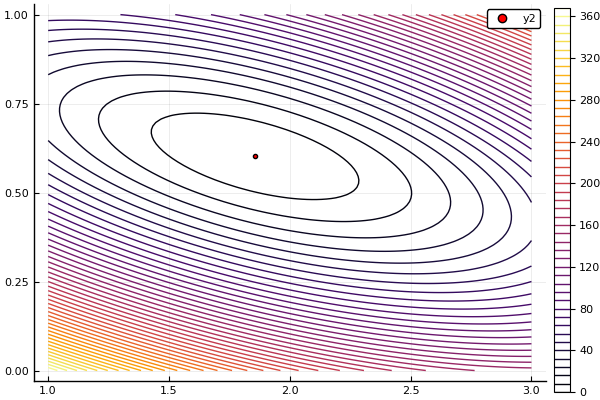

In [6]:
E(α,β) = 0.5 * sum((y[i] - α - β * x[i])^2 for i = 1:m)
contour(range(1, 3, length=100),
        range(0.0, 1.0, length=100),
        E,
        levels = 50)
scatter!([α], [β], c=:red, ms=3)

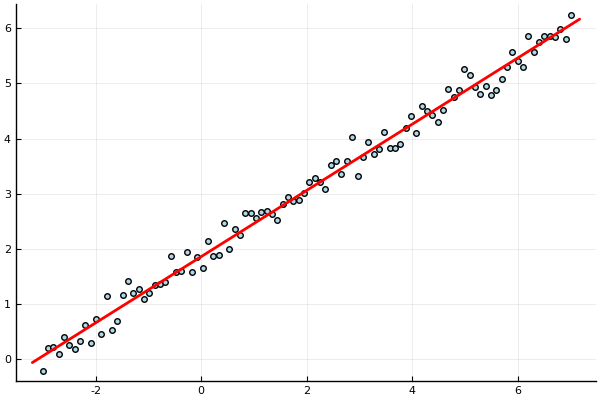

In [7]:
scatter(x, y, leg=false, c=:lightblue, ms=4)
plot!(x -> α + β * x, c=:red, lw=2)

Não existe uma reta que passa por todos esses pontos. Inclusive, alguns deles podem ter o mesmo $x$,
de modo que não existe nenhum função que passa por eles.
Sendo assim, precisamos encontrar uma reta que aproxima estes pontos.

Essa reta é definida por $L(x) = \alpha + \beta x$, e precisamos encontrar esses valores para $\alpha$ e $\beta$.

Uma estratégia é considerar o erro de aproximação e tentar minimizá-lo.
Vamos separar o erro termo a termo, obtendo assim um Erro$_i$, que depende
dos valores de $\alpha$ e $\beta$.

Nosso problema pode ser escrito como
$$ \min E(\alpha,\beta) = \sum_{i=1}^m \mbox{Erro}_i(\alpha,\beta). $$

Já sabemos que para minimizar uma função, devemos buscar seus pontos críticos.
Isto é,
$$ \frac{\partial E}{\partial \alpha} = 0, $$
e
$$ \frac{\partial E}{\partial \beta} = 0. $$

Para calcular essa derivada, devemos calcular a derivada de Erro$_i$.
Então, a escolha dessa função de erro deve ser bem pensada, para que seja
significativa e fácil de derivar.

A escolha mais comum é Erro$_i = \frac{1}{2}[\alpha + \beta x_i - y_i]^2 = \frac{1}{2}[L(x_i) - y_i]^2$.

Essa escolha é boa pois a derivada dessa função é fácil de calcular, e é fácil de visualizar que é o quadrado da distância vertical da reta ao ponto $(x_i,y_i)$.

In [8]:
(-99 + 5 * 18) / 14

-0.6428571428571429

In [9]:
1 .+ x - y

100-element Array{Float64,1}:
 -1.7883464908842335
 -2.1014872973351504
 -2.006292341046082 
 -1.7828676947703055
 -1.9902916479288981
 -1.7520768326541205
 -1.5643837665874123
 -1.618475349400923 
 -1.8093531593322898
 -1.3709178807771525
 -1.711868964046491 
 -1.3458085249670022
 -1.930153516239377 
  ⋮                 
  1.3126728148134772
  1.5879912850858968
  1.797813809399516 
  1.3377945066909254
  1.719208076475235 
  1.6483346161191248
  1.6413061632138826
  1.7367158069365454
  1.8504952374895405
  1.810912390753045 
  2.091591411661752 
  1.7499637884428338

In [10]:
sum((1 .+ x - y).^2)

138.62357093691145

In [11]:
E(α,β) = 0.5 * sum((α .+ β*x - y).^2)

E (generic function with 1 method)

In [12]:
E(0,0)

623.7448498846426

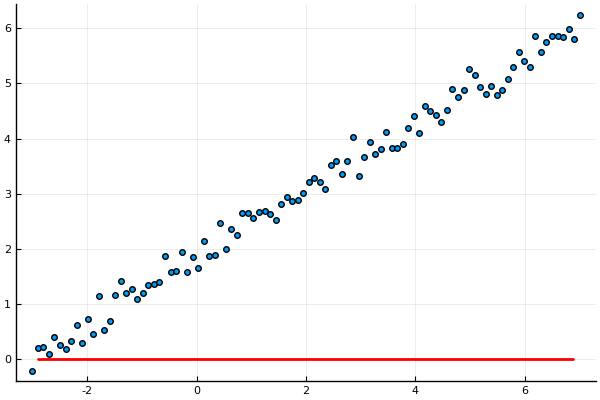

In [13]:
scatter(x, y, leg=false)
plot!(x->0 + 0*x, x[1], x[m], c=:red, lw=2)

In [14]:
E(2,0)

211.79895391163947

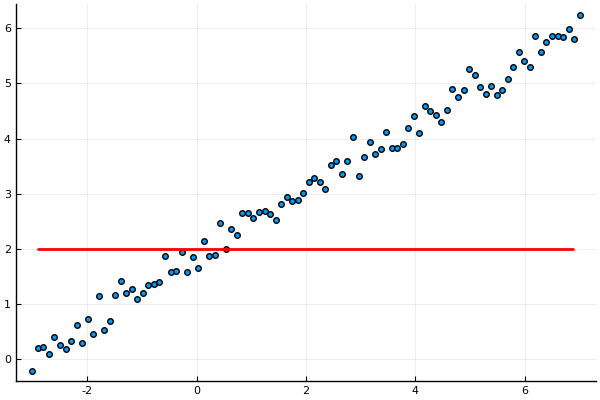

In [15]:
scatter(x, y, leg=false)
plot!(x->2 + 0*x, x[1], x[m], c=:red, lw=2)

In [16]:
E(2,0.5)

6.297851925753034

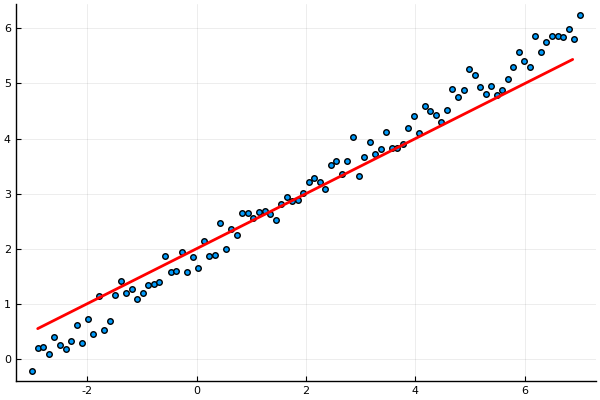

In [17]:
scatter(x, y, leg=false)
plot!(x->2 + 0.5*x, x[1], x[m], c=:red, lw=2)

É fácil ver que

$$ \partial_{\alpha} E(\alpha,\beta) = \sum_{i=1}^m (\alpha + \beta x_i - y_i), $$
e
$$ \partial_{\beta} E(\alpha,\beta) = \sum_{i=1}^m x_i (\alpha + \beta x_i - y_i). $$

Como nosso objetivo é encontrar $\alpha$ e $\beta$ tal que essas duas equações sejam zero, obtemos um sistema em $\alpha$ e $\beta$:

\begin{align*}
\alpha \bigg(\sum_{i=1}^m 1\bigg) + \beta\bigg(\sum_{i=1}^m x_i\bigg) & = \sum_{i=1}^m y_i \\
\alpha \bigg(\sum_{i=1}^m x_i\bigg) + \beta\bigg(\sum_{i=1}^m x_i^2\bigg) & = \sum_{i=1}^m x_i y_i
\end{align*}

Esse sistema é bastante fácil de resolver.

In [4]:
# Lembrando
using LinearAlgebra

dot(x, y)

1134.6519817911096

In [5]:
M = [m  sum(x); sum(x)   dot(x,x)]

2×2 Array{Float64,2}:
 100.0   200.0 
 200.0  1250.17

In [6]:
b = [sum(y); dot(x,y)]

2-element Array{Float64,1}:
  313.96720817385597
 1134.6519817911096 

In [7]:
α, β = M\b

2-element Array{Float64,1}:
 1.9476315515469622
 0.5960202650957986

In [8]:
E(α,β)

UndefVarError: UndefVarError: E not defined

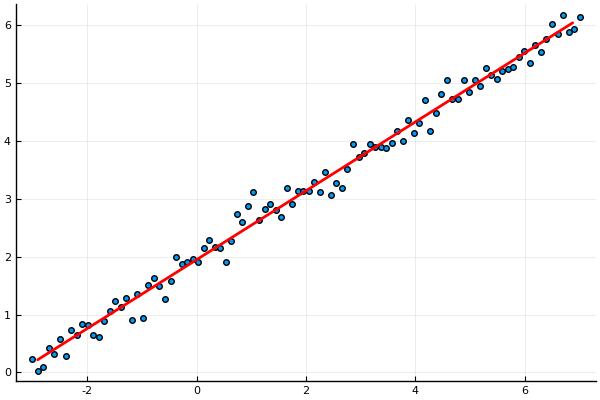

In [9]:
scatter(x, y, leg=false)
plot!(x->α + β*x, x[1], x[m], c=:red, lw=2)

Visualmente, a reta parece aproximar bem mesmo os pontos dados.

Um problema levemente diferente, mas parecido é o seguinte: todos os dias por um ano uma pessoa anota a temperatura média do dia.

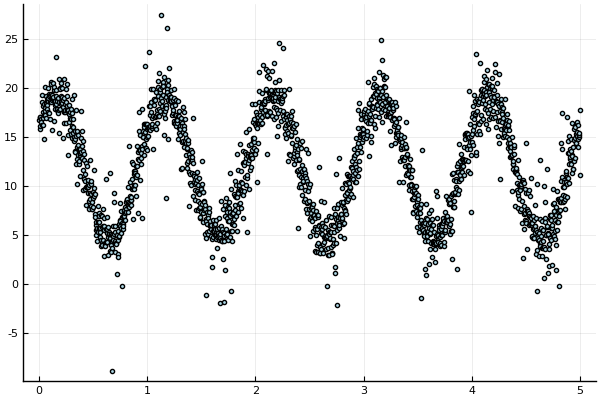

In [17]:
using Random
Random.seed!(0)
m = 365 * 5
t = range(0, 5, length=m)

phi1(t) = sin(2pi*t)
phi2(t) = cos(2pi*t)
phi3(t) = 1


b = 6*phi1.(t) + 4*phi2.(t) + 12*phi3.(t) + randn(m)*1.1 +
    [rand() < 0.2 ? randn() * 3.5 : 0.0 for i = 1:m]
y = b

scatter(t, b, c=:lightblue, ms=3, leg=false)

In [18]:
using LinearAlgebra

ϕ₁ = ones(m)
ϕ₂ = sin.(2π * t)
ϕ₃ = cos.(2π * t)

M = [dot(ϕ₁, ϕ₁)  dot(ϕ₂, ϕ₁)  dot(ϕ₃, ϕ₁);
     dot(ϕ₁, ϕ₂)  dot(ϕ₂, ϕ₂)  dot(ϕ₃, ϕ₂);
     dot(ϕ₁, ϕ₃)  dot(ϕ₂, ϕ₃)  dot(ϕ₃, ϕ₃)]

c = [dot(ϕ₁, y); dot(ϕ₂, y); dot(ϕ₃, y)]

β = M \ c

3-element Array{Float64,1}:
 11.948724937057298
  5.93653959451417 
  4.010870127384618

In [19]:
y_pred = β[1] * ϕ₁ + β[2] * ϕ₂ + β[3] * ϕ₃

1825-element Array{Float64,1}:
 15.959595064441917
 16.061243947827247
 16.161672866525947
 16.26085202864307 
 16.35875201301969 
 16.455343777960564
 16.550598669849276
 16.644488431648224
 16.73698521128097 
 16.82806156989447 
 16.917690489998716
 17.00584538348137 
 17.09250009949505 
  ⋮                
 14.769804207038755
 14.882809459766431
 14.99494432636436 
 15.106175542408227
 15.216470111538529
 15.325795315248945
 15.434118722592007
 15.54140819979974 
 15.647631919816003
 15.752758371737851
 15.85675637016324 
 15.95959506444191 

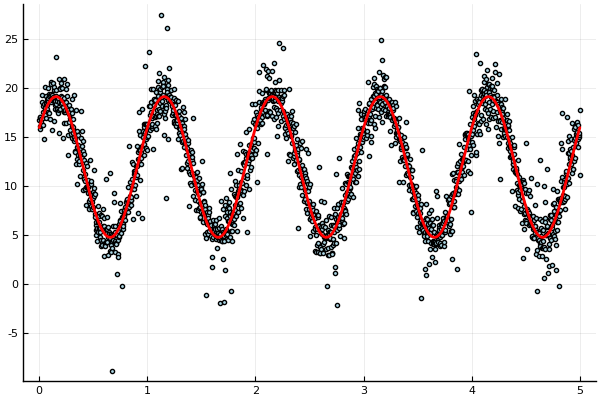

In [20]:
scatter(t, y, c=:lightblue, ms=3, leg=false)
plot!(t, y_pred, c=:red, lw=2)

Seu objetivo é estimar a temperatura em um dia no futuro. Olhando para o gráfico, aparentemente a temperatura segue um modelo do tipo
$$
T(t) = \alpha + \beta \sin(2\pi t) + \gamma \cos(2\pi t).
$$
Note que o intervalo foi normalizado para $t \in [0,1]$.

Se $T_i$ é o valor medido no instante $t_i = \dfrac{i-1}{364}$, então definimos o erro como
$$ E(\alpha,\beta,\gamma) =
    \frac{1}{2}\sum_{i=1}^m [T(t_i) - T_i]^2. $$

Novamente, para minimizar esse erro, calcularemos as derivadas parciais e igualaremos a zero.
Note que apesar de $T$ ser uma função não linear em $t$, ela é linear em $\alpha$, $\beta$ e $\gamma$.

\begin{align}
\partial_{\alpha} E(\alpha,\beta,\gamma)
& = \sum_{i = 1}^m [T(t_i) - T_i] = 0 \\
\partial_{\beta} E(\alpha,\beta,\gamma)
& = \sum_{i = 1}^m [T(t_i) - T_i] \sin(2\pi t_i) = 0 \\
\partial_{\gamma} E(\alpha,\beta,\gamma)
& = \sum_{i = 1}^m[T(t_i) - T_i] \cos(2\pi t_i) = 0.
\end{align}

\begin{align}
\alpha \bigg(\sum_{i=1}^m 1\bigg) +
\beta  \bigg(\sum_{i=1}^m \sin(2\pi t_i)\bigg) +
\gamma \bigg(\sum_{i=1}^m \cos(2\pi t_i)\bigg)
& = \sum_{i=1}^m T_i \\
\alpha \bigg(\sum_{i=1}^m \sin(2\pi t_i)\bigg) +
\beta  \bigg(\sum_{i=1}^m \sin^2(2\pi t_i)\bigg) +
\gamma \bigg(\sum_{i=1}^m \sin(2\pi t_i)\cos(2\pi t_i)\bigg)
& = \sum_{i=1}^m T_i \sin(2\pi t_i) \\
\alpha \bigg(\sum_{i=1}^m \cos(2\pi t_i)\bigg) +
\beta  \bigg(\sum_{i=1}^m \sin(2\pi t_i)\cos(2\pi t_i)\bigg) +
\gamma \bigg(\sum_{i=1}^m \cos^2(2\pi t_i)\bigg)
& = \sum_{i=1}^m T_i \cos(2\pi t_i).
\end{align}

Note que podemos facilitar a maneira de escrever esse sistema definindo os seguintes vetores
$$
v^{(1)} = \left(\begin{array}{c}
1 \\
1 \\
\vdots \\
1
\end{array}\right),
\quad
v^{(2)} = \left(\begin{array}{c}
\sin(2\pi t_1) \\
\sin(2\pi t_2) \\
\vdots \\
\sin(2\pi t_{365})
\end{array}\right),
\quad
v^{(3)} = \left(\begin{array}{c}
\cos(2\pi t_1) \\
\cos(2\pi t_2) \\
\vdots \\
\cos(2\pi t_{365})
\end{array}\right),
\quad
b = \left(\begin{array}{c}
T_1 \\
T_2 \\
\vdots \\
T_{365}
\end{array}\right).
$$

Daí, a matriz do sistema é
$$\left[\begin{array}{ccc}
\left\langle v^{(1)}, v^{(1)} \right\rangle &
\left\langle v^{(1)}, v^{(2)} \right\rangle &
\left\langle v^{(1)}, v^{(3)} \right\rangle \\
\left\langle v^{(2)}, v^{(1)} \right\rangle &
\left\langle v^{(2)}, v^{(2)} \right\rangle &
\left\langle v^{(2)}, v^{(3)} \right\rangle \\
\left\langle v^{(3)}, v^{(1)} \right\rangle &
\left\langle v^{(3)}, v^{(2)} \right\rangle &
\left\langle v^{(3)}, v^{(3)} \right\rangle
\end{array}\right],$$
e o vetor do lado direito é
$$\left[\begin{array}{c}
\left\langle v^{(1)}, b \right\rangle \\
\left\langle v^{(2)}, b \right\rangle \\
\left\langle v^{(3)}, b \right\rangle
\end{array}\right].$$

In [28]:
m = 365
t = range(0, 1, length=m)
v1 = ones(m)
v2 = sin.(2π * t)
v3 = cos.(2π * t)
M = [dot(v1, v1) dot(v1, v2) dot(v1, v3);
     dot(v2, v1) dot(v2, v2) dot(v2, v3);
     dot(v3, v1) dot(v3, v2) dot(v3, v3)] 
c = [dot(v1, b); dot(v2, b); dot(v3, b)]

3-element Array{Float64,1}:
 4386.822872335359 
 1076.7290428080205
  735.531985591639 

In [29]:
α, β, γ = M\c

3-element Array{Float64,1}:
 12.007860790666511
  5.916093641802309
  3.953683742081818

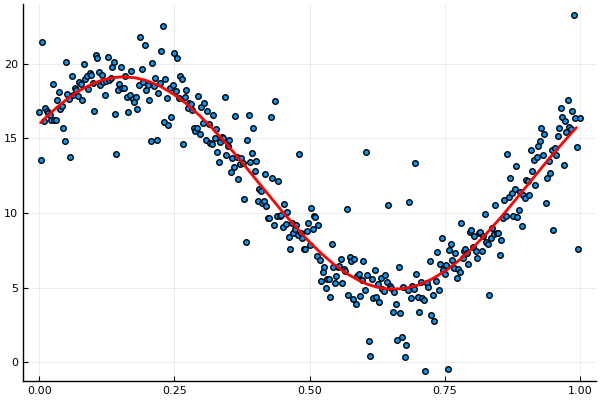

In [30]:
scatter(t, b, leg=false)
plot!(t->α + β*sin(2π*t) + γ*cos(2π*t), 0, 1, c=:red, lw=2)

Vimos como adaptar um conjunto de dados por alguns modelos específicos.
De uma maneira geral, podemos considerar um modelo da forma
$$ f(x) = \alpha_1 \phi_1(x) + \dots + \alpha_n \phi_n(x), $$
e fazer o mesmo procedimento.

Esse problema com esse modelo é dito **quadrados mínimos lineares discretos.**

Para encontrar os parâmetros $\alpha$ fazemos o mesmo procedimento anterior:
$$ \min E(\alpha) = \frac{1}{2} \sum_{i=1}^m [y_i - f(x_i)]^2
= \frac{1}{2} \sum_{i=1}^m \bigg[y_i - \sum_{j=1}^n \alpha_j\phi_j(x_i)\bigg]^2. $$

Derivando em cada $\alpha_k$ nos dá um sistema $M\alpha = c$, onde
$$ M_{kj} = \sum_{i=1}^m \phi_k(x_i)\phi_j(x_i) \qquad \mbox{e}
\qquad c_j = \sum_{i=1}^m \phi_j(x_i) y_i. $$

Dados a função $\phi_j$ e os pontos $x_i$, podemos definir um vetor $\overline{\phi}_j = (\phi_j(x_1), \dots, \phi_j(x_m))^T$, isto é, o vetor obtido aplicando $\phi_j$ em cada elemento $x_i$.
Com essa definição, podemos escrever
$$ M_{k,j} = \langle\overline{\phi}_k,\overline{\phi}_j\rangle \qquad \mbox{e} \qquad
c_j = \langle\overline{\phi}_j, y\rangle. $$

O sistema $M\alpha = c$ é chamado de **sistema normal**.

A medida de qualidade para cada dado individual é dada pelo **resíduo**:
$$ r = \left[\begin{array}{c}
y_1 - f(x_1) \\
y_2 - f(x_2) \\
\vdots \\
y_m - f(x_m)
\end{array}\right] $$

O erro pode ser escrito como $E(\alpha) = \frac{1}{2}\Vert r\Vert^2$.

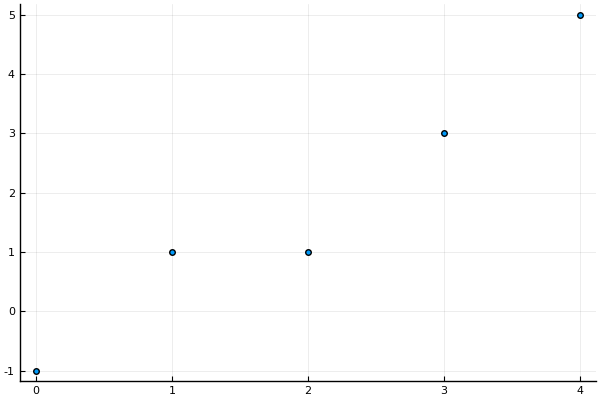

In [31]:
x = [0.0; 1; 2; 3; 4]
y = [-1.0; 1; 1; 3; 5]
scatter(x, y, leg=false)

In [32]:
A = [ones(5)  x  x.^2]

5×3 Array{Float64,2}:
 1.0  0.0   0.0
 1.0  1.0   1.0
 1.0  2.0   4.0
 1.0  3.0   9.0
 1.0  4.0  16.0

In [33]:
A' * A

3×3 Array{Float64,2}:
  5.0   10.0   30.0
 10.0   30.0  100.0
 30.0  100.0  354.0

In [34]:
A' * y

3-element Array{Float64,1}:
   9.0
  32.0
 112.0

In [35]:
β = (A' * A) \ (A' * y)

3-element Array{Float64,1}:
 -0.7142857142857146
  0.8285714285714288
  0.1428571428571428

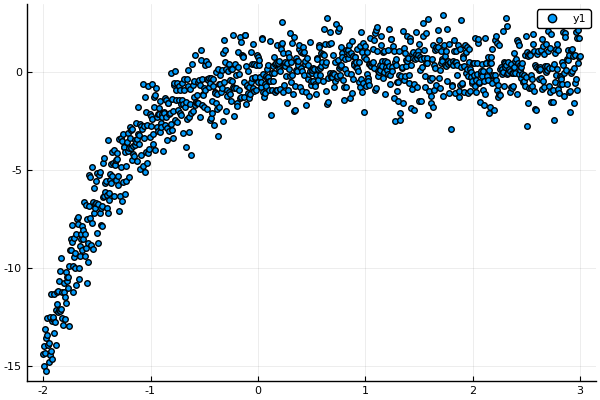

In [36]:
n = 1000
x = range(-2, 3, length=n)
y = exp.(-x) .* x + randn(n)
scatter(x, y)

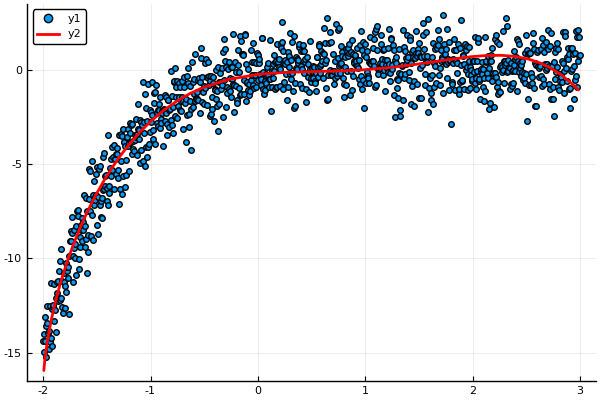

In [37]:
ϕ1(x) = log(x + 2 + 1e-8)
ϕ2(x) = sqrt(x + 2)
ϕ3(x) = 1.0
ϕ4(x) = exp(x)
ϕ5(x) = sin(x)
X = [ϕ1.(x) ϕ2.(x) ϕ3.(x) ϕ4.(x) ϕ5.(x)]
β = (X' * X) \ (X' * y)
scatter(x, y)
plot!(x -> β[1] * ϕ1(x) + β[2] * ϕ2(x) + β[3] * ϕ3(x) + β[4] * ϕ4(x) + β[5] * ϕ5(x), -2, 3, c=:red, lw=2)

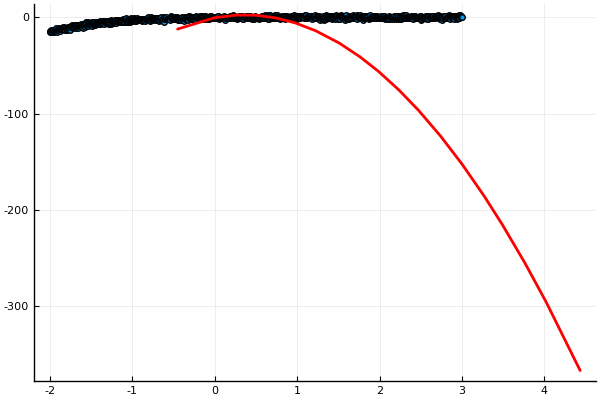

In [38]:
scatter(x, y, leg=false)
plot!(x -> β[1] + β[2] * x + β[3] * x^2, -0.5, 4.5, c=:red, lw=2)

In [39]:
"""`regressao_linear(x, y)`
Calcule y ~ α + β x
"""
function regressao_linear(x, y)
    m = length(x)
    A = [ones(m)  x]
    sol = (A' * A) \ (A' * y)
    α, β = sol[1], sol[2]
    return α, β
end

regressao_linear

In [23]:
"""
y ~ β₀ + β₁ x + … + βₚ xᵖ
"""
function regressao_polinomial(x, y, p)
    m = length(x)
    A = ones(m, p + 1)
    for i = 1:m
        for j = 2:p+1
            A[i,j] = x[i]^(j - 1)
        end
    end
    β = (A' * A) \ (A' * y)
    return β
end

regressao_polinomial

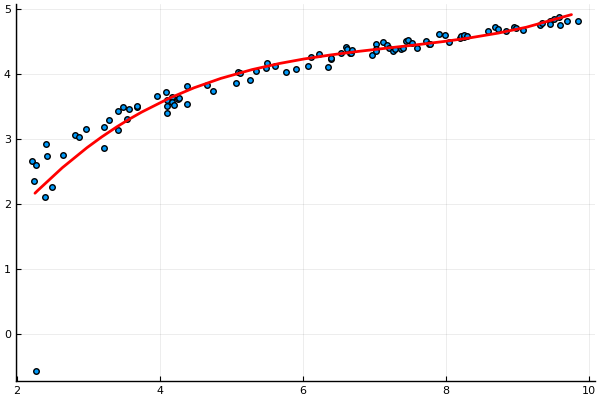

In [41]:
using DelimitedFiles
data = readdlm("dados.csv", ',')
x, y = data[:,1], log.(data[:,2] .- 44)
p = 3
β = regressao_polinomial(x, y, p)
scatter(x, y, leg=false)
plot!(x -> β[1] + sum(β[j+1]*x^j for j = 1:p), x[1], x[end], lw=2, c=:red)

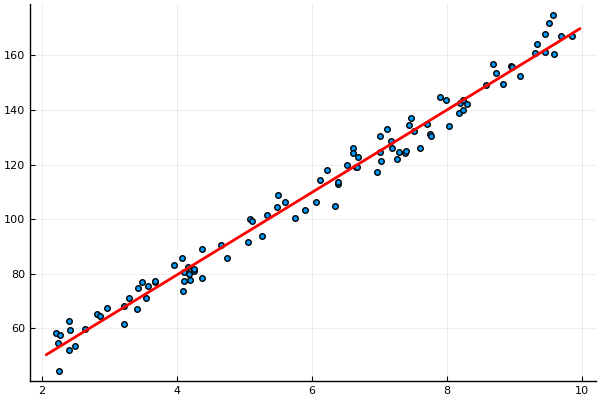

In [42]:
data = readdlm("dados.csv", ',')
x, y = data[:,1], data[:,2]
α, β = regressao_linear(x, y)
scatter(x, y, leg=false)
plot!(x -> α + β * x, lw=2, c=:red)

In [43]:
function quadmin(x, y, F::Array{Function})
    # Implemente
end

quadmin (generic function with 1 method)

In [44]:
F = [x->1, x->sin(2π*x), x->cos(2π*x), x->sin(4π*x), x->cos(4π*x), x->sin(6π*x), x->cos(6π*x)]
n = length(F)
# Mesmos t e b do exemplo anterior
α = quadmin(t, b, F)
scatter(t, b, leg=false, ms=3, c=:lightblue)
#plot!(t->α[1]*F[1](t) + α[2]*F[2](t) + α[3]*F[3](t), 0, 1, c=:red, lw=2)
plot!(t -> sum(α[j]*F[j](t) for j = 1:n), 0, 1, c=:red, lw=2)

MethodError: MethodError: no method matching getindex(::Nothing, ::Int64)

In [45]:
# Podemos escrever essa combinação de uma maneira resumida
f(t) = sum(α[i] * F[i](t) for i = 1:3)

f (generic function with 1 method)

In [46]:
scatter(t, b, leg=false)
plot!(f, 0, 1, c=:red, lw=2)

MethodError: MethodError: no method matching getindex(::Nothing, ::Int64)

## Avaliando o modelo

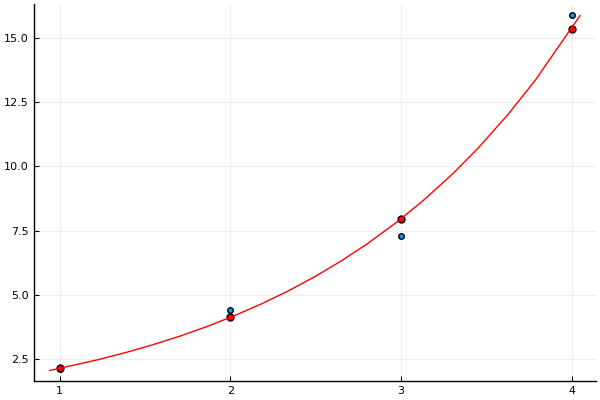

In [21]:
X = [ones(4) collect(1:4)]
y = [2.1; 4.4; 7.3; 15.9]
lny = log.(y)
X \ lny
β = [0.0996; 0.658]
exp.(X * β)


x = collect(1:4)
scatter(x, y, leg=false)
scatter!(x, exp.(X * β), c=:red, ms=5)
plot!(x -> exp(β[1] + β[2] * x), c=:red)

A avaliação de um modelo...

### Regressão Polinomial - Implementação

In [25]:
"""
y ~ β₀ + β₁ x + … + βₚ xᵖ
"""
function regressao_polinomial(x, y, p)
    m = length(x)
    A = ones(m, p + 1)
    for i = 1:m
        for j = 2:p+1
            A[i,j] = x[i]^(j - 1)
        end
    end
    β = (A' * A) \ (A' * y)
    return β
end

regressao_polinomial

###  $R^2$

Vamos voltar para o problema inicial de ajustar dados por uma reta: $(x_i, y_i), i = 1,\dots,m$.
Vamos chamar a solução encontrada de $\hat{y} = a x + b$, isto é $\hat{y}_i = a x_i + b \approx y_i$.

O método de Quadrados Mínimos encontrou o menor valor possível para $\displaystyle \sum_{i=1}^m(\hat{y}_i - y_i)^2$, porém não é uma métrica suficiente de qualidade. Vamos definir $$S_r = \displaystyle \sum_{i=1}^m(\hat{y}_i - y_i)^2.$$

Por outro lado, vamos considerar a variação da média dos dados $y_i$:
$$ S_T = \sum_{i=1}^m(y_i - y_{Med})^2,$$
onde $\displaystyle y_{Med} = \frac{1}{m} \sum_{i=1} y_i$ é a média dos dados $y_i$.

Veja que $S_T$ pode ser visto como o erro do modelo constante igual à $y_{Med}$.

In [46]:
using Random, Statistics
Random.seed!(0)
m = 10
x = collect(range(-3, 7, length=m))
y = 1.9 .+ 0.6*x + randn(m)*0.75 # Gerando pontos aleatórios

M = [m sum(x); sum(x) dot(x,x)]
b = [sum(y); dot(x,y)]
α = M \ b
p = 1
α = regressao_polinomial(x, y, p)

y_pred = α[1] .+ α[2] * x# + α[3] * x.^2 + α[4] * x.^3
y_pred = α[1] .+ sum(α[j+1] * x.^j for j = 1:p)
y_med = mean(y)

3.3189746902718134

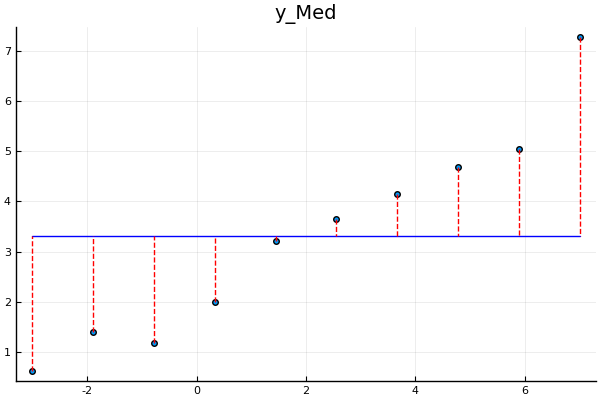

In [47]:
scatter(x, y, leg=false)
plot!([x[1], x[end]], [y_med, y_med], c=:blue)
for i = 1:m
    plot!([x[i], x[i]], [y[i], y_med], c=:red, l=:dash)
end
title!("y_Med")

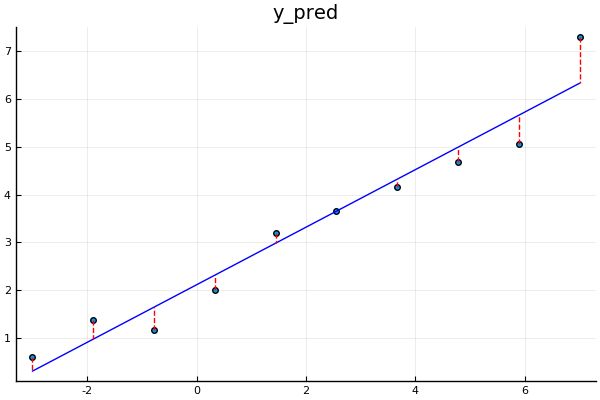

In [48]:
scatter(x, y, leg=false)
#plot!(x, y_pred, c=:blue)
xlin = range(x[1], x[end], length=100)
ylin = α[1] .+ sum(α[j+1] * xlin.^j for j = 1:p)
plot!(xlin, ylin, c=:blue)
for i = 1:m
    plot!([x[i], x[i]], [y[i], y_pred[i]], c=:red, l=:dash)
end
title!("y_pred")

A métrica $R^2$ é definida pela fórmula
$$ R^2 = 1 - \frac{S_r}{S_T}. $$

Quanto mais próximo de $1$, melhor o modelo.

In [49]:
R2 = 1 - norm(y_pred - y)^2 / norm(y_med .- y)^2

0.947388477570736

Para um modelo não ótimo:

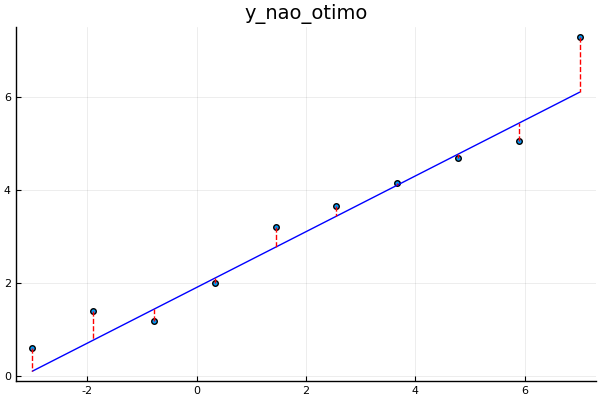

In [50]:
y_nao_otimo = 1.9 .+ 0.6*x # Escolhido sabiamente

scatter(x, y, leg=false)
plot!(x, y_nao_otimo, c=:blue)
for i = 1:m
    plot!([x[i], x[i]], [y[i], y_nao_otimo[i]], c=:red, l=:dash)
end
title!("y_nao_otimo")

In [51]:
R2 = 1 - norm(y_nao_otimo - y)^2 / norm(y_med .- y)^2

0.9350294978415356

### Exemplo polinomial

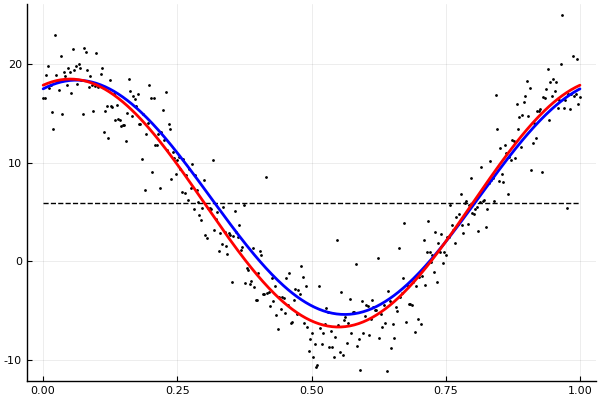

In [52]:
m = 365
t = range(0, 1, length=m)
v1 = ones(m)
v2 = sin.(2π * t)
v3 = cos.(2π * t)
y = 6 * v1 + 4 * v2 + 12 * v3 + randn(m)*2.0 +
    [rand() < 0.2 ? randn() * 3.5 : 0.0 for i = 1:m]
M = [dot(v1, v1) dot(v1, v2) dot(v1, v3);
     dot(v2, v1) dot(v2, v2) dot(v2, v3);
     dot(v3, v1) dot(v3, v2) dot(v3, v3)] 
c = [dot(v1, y); dot(v2, y); dot(v3, y)]
α = M \ c
y_pred = α[1] * v1 + α[2] * v2 + α[3] * v3
y_med = mean(y)
y_quase = 6.5 * v1 + 4.5 * v2 + 11 * v3

scatter(t, y, c=:black, ms=1, leg=false)
plot!([t[1], t[end]], [y_med, y_med], c=:black, l=:dash, lw=1)
plot!(t, y_quase, c=:blue, lw=2)
plot!(t, y_pred, c=:red, lw=2)

In [53]:
ST = norm(y .- y_med)^2
Sr_quase = norm(y - y_quase)^2
Sr_pred = norm(y - y_pred)^2
R2_quase = 1 - Sr_quase / ST
R2_pred = 1 - Sr_pred / ST
println("R2_quase = $R2_quase")
println("R2_pred = $R2_pred")

R2_quase = 0.9148793698045714
R2_pred = 0.92622322161022


## Validação Cruzada

Outra questão do ajuste é que se ele generaliza bem o problema. Podemos ajustar um conjunto de dados com $x$ distintos por um polinômio de grau suficientemente grande e obter uma solução perfeita:

In [141]:
function regressao_polinomial(x, y, p)
    m = length(x)
    A = [ones(m) [x[i]^j for i = 1:m, j = 1:p]]
    #β = (A' * A) \ (A' * y)
    β = A \ y
    return β
end

regressao_polinomial (generic function with 1 method)

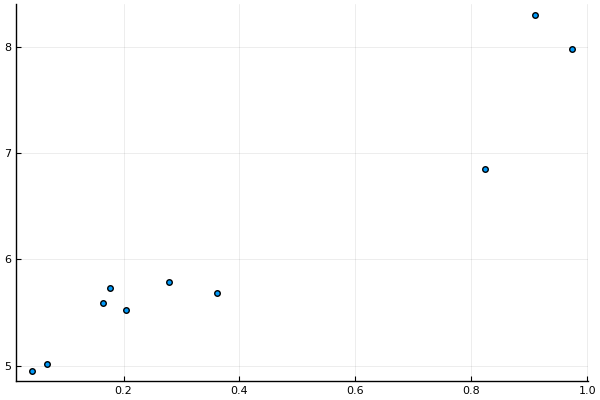

In [112]:
Random.seed!(0)
m = 10
x = sort(rand(m))
#x = collect(range(-1, 1, length=m))
y = 3x .+ 5 + randn(m) * 0.25
scatter(x, y, leg=false)

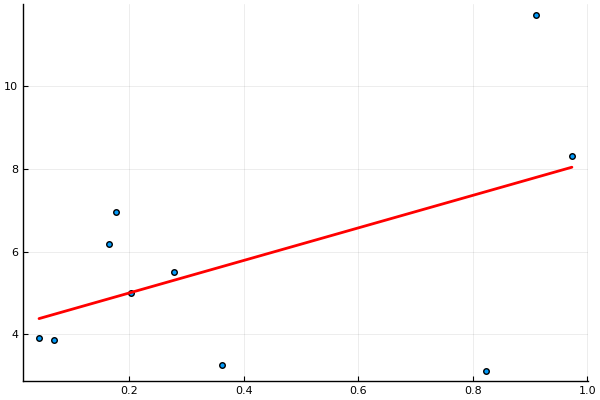

In [110]:
p = 1
β = regressao_polinomial(x, y, p)
xlin = range(extrema(x)..., length=100)
y_pred = [β[1] + sum(β[j + 1] * xi^j for j = 1:p) for xi = xlin]
scatter(x, y, leg=false)
plot!(xlin, y_pred, c=:red, lw=2)
#ylims!(4.9, 8.1)

In [101]:
y_med = mean(y)
y_pred = [β[1] .+ sum(β[j + 1] * x[i].^j for j = 1:p) for i = 1:m]
ST = norm(y .- y_med)^2
Sr_pred = norm(y - y_pred)^2
R2_pred = 1 - Sr_pred / ST

0.947388477570736

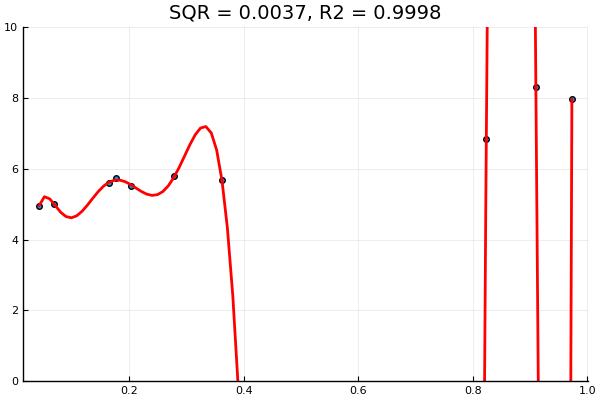

In [116]:
using Printf

p = 9

β = regressao_polinomial(x, y, p)
y_pred = [β[1] + sum(β[j + 1] * xi^j for j = 1:p) for xi = x]

xlin = range(extrema(x)..., length=100)
ylin = [β[1] + sum(β[j + 1] * xi^j for j = 1:p) for xi = xlin]
scatter(x, y, leg=false)
plot!(xlin, ylin, c=:red, lw=2)
ylims!(0, 10)

R2 = 1 - norm(y - y_pred)^2 / norm(y .- y_med)^2
title!(@sprintf("SQR = %6.4f, R2 = %6.4f", norm(y_pred - y)^2, R2))

**Dados além dos conhecidos**

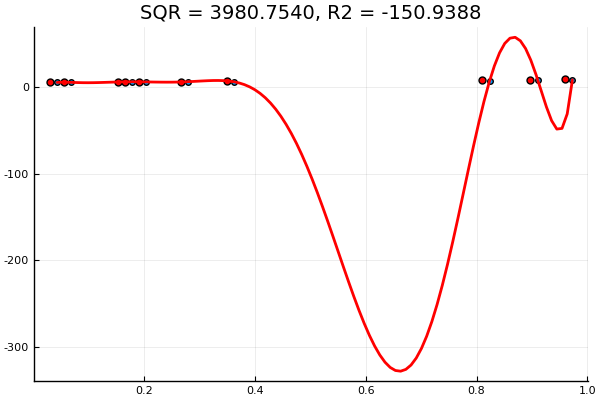

In [120]:
using Printf

Random.seed!(0)
mais_x = x[1:end] .- (x[2] - x[1]) / 2
mais_y = 3mais_x .+ 5 + randn(length(mais_x)) * 0.75

p = 9
β = regressao_polinomial(x, y, p)
y_pred = [β[1] + sum(β[j + 1] * xi^j for j = 1:p) for xi = mais_x]

xlin = range(extrema(x)..., length=100)
ylin = [β[1] + sum(β[j + 1] * xi^j for j = 1:p) for xi = xlin]
scatter(x, y, leg=false)
scatter!(mais_x, mais_y, c=:red, ms=5)
plot!(xlin, ylin, c=:red, lw=2)

R2 = 1 - norm(mais_y - y_pred)^2 / norm(mais_y .- y_med)^2
title!(@sprintf("SQR = %6.4f, R2 = %6.4f", norm(y_pred - mais_y)^2, R2))

### Validação Cruzada - Separação em treino e teste

Separamos uma porcentagem dos dados para treinar o modelo e encontrar os parâmetros, e avaliamos o modelo sobre os dados restantes.

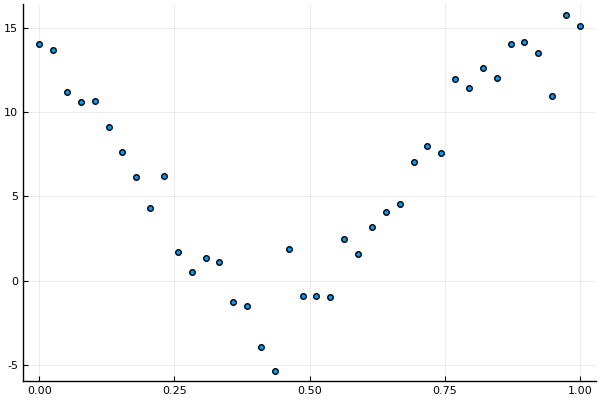

In [122]:
Random.seed!(0)
m = 40
#x = sort(rand(m))
x = range(0, 1, length=m)
#y = 5 + 3x - 2x.^2 + randn(m) * 0.05
y = 6 .- 3 * sin.(2π * x) + 7 * cos.(2π * x) + randn(m) * 1.5
scatter(x, y, leg=false)

In [138]:
Random.seed!(0)
I = randperm(m)
x, y = x[I], y[I]
k = round(Int, 0.6m)
x_tr, y_tr, x_te, y_te = x[1:k], y[1:k], x[k+1:end], y[k+1:end]

p = 6
β = regressao_polinomial(x_tr, y_tr, p) # Apenas o conjunto de treino é usado
y_pred = [β[1] + sum(β[j + 1] * xi^j for j = 1:p) for xi = x_te]
erro = 0.5 * norm(y_te - y_pred)^2

28.003571080475936

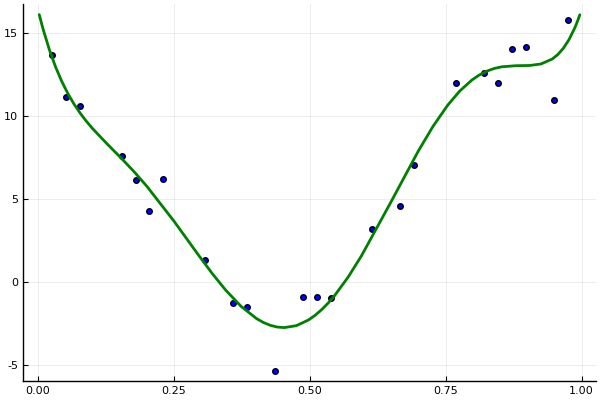

In [139]:
scatter(leg=false)
scatter!(x_tr, y_tr, c=:blue)
plot!(x -> β[1] + sum(β[j + 1] * x^j for j = 1:p), 0, 1.0, c=:green, lw=2)

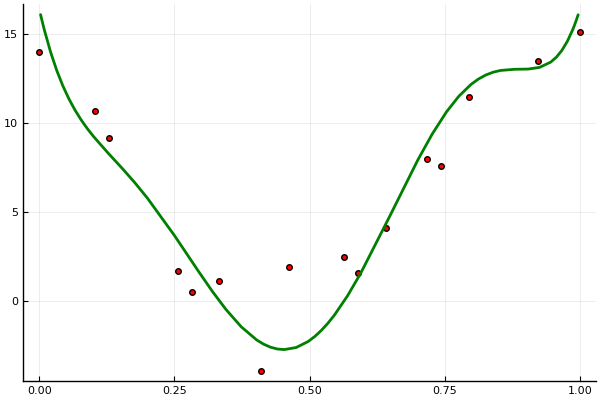

In [140]:
scatter(leg=false)
scatter!(x_te, y_te, c=:red)
plot!(x -> β[1] + sum(β[j + 1] * x^j for j = 1:p), 0, 1.0, c=:green, lw=2)

In [142]:
max_p = 15
erro_treino = []
erro_teste = []
for p = 1:max_p
    β = regressao_polinomial(x_tr, y_tr, p)
    xlin = range(0, 1, length=100)
    y_pred = [β[1] + sum(β[j + 1] * xi^j for j = 1:p) for xi = x]
    push!(erro_treino, 0.5 * norm(y_tr - y_pred[1:k])^2 / k)
    push!(erro_teste, 0.5 * norm(y_te - y_pred[k+1:end])^2 / (m - k))
end

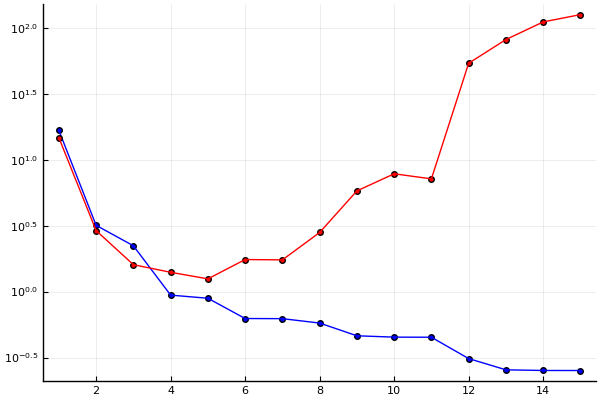

In [143]:
scatter(1:max_p, erro_treino, c=:blue, leg=false, yaxis=:log)
plot!(1:max_p, erro_treino, c=:blue)
scatter!(1:max_p, erro_teste, c=:red)
plot!(1:max_p, erro_teste, c=:red)

# Um pouco mais sobre a visão estatística

Suponha uma relação real $y = \beta_0 + \beta_1 x + \epsilon$ onde $\epsilon$ é um erro do tipo normal.

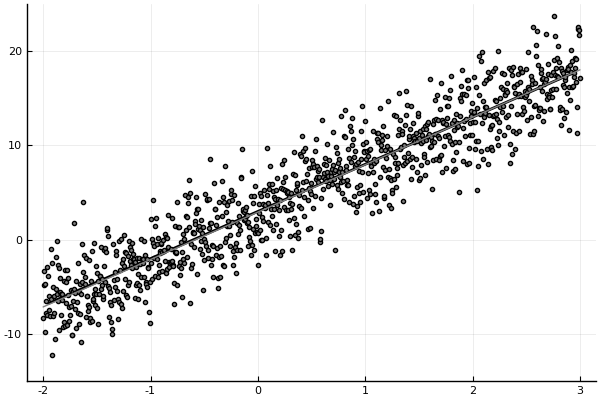

In [147]:
β = [3.0; 5.0]
σ = 2.7
plot(x -> β[1] + β[2] * x, -2, 3, c=:black, lw=2, leg=false)
# uma amostra
n = 1000
x = range(-2, 3, length=n)
y = β[1] .+ β[2] * x + randn(n) * σ
scatter!(x, y, ms=3, c=:gray)
X = [ones(n) x]
βhat = (X' * X) \ (X' * y)
yhat = X * βhat
#yhat = X * [1.0; 9.0]
plot!(x, yhat, c=:gray)
ylims!(-15, 25)

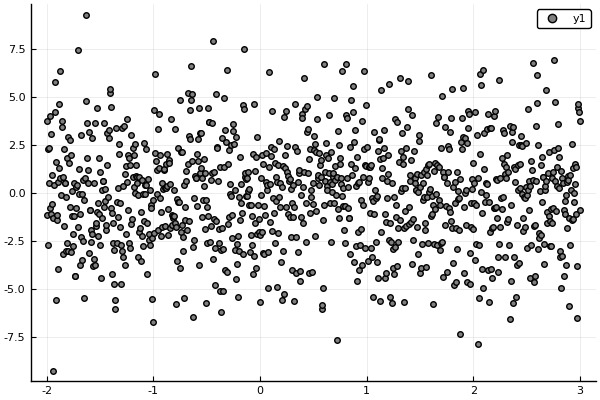

In [148]:
scatter(x, y - yhat, c=:gray)

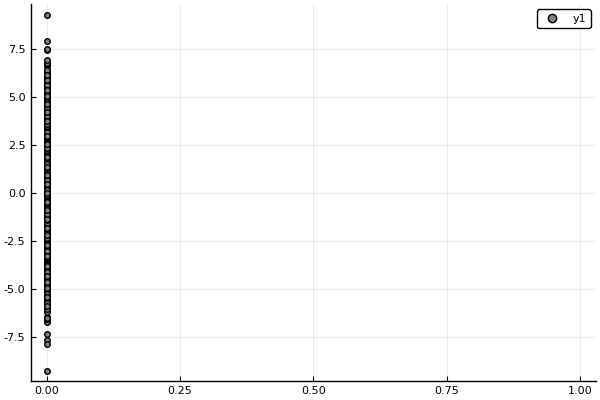

In [149]:
scatter(x * 0, y - yhat, c=:gray)

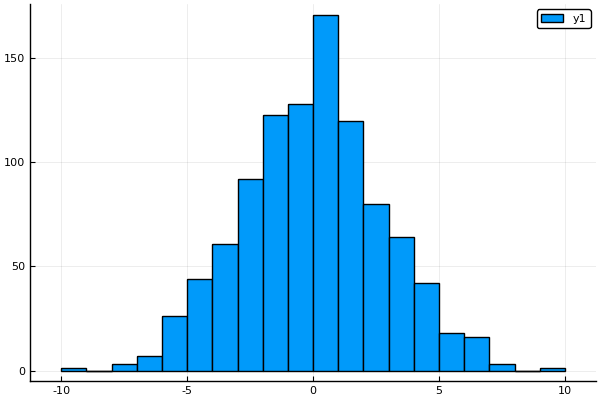

In [150]:
histogram(x, y - yhat, bins=20)

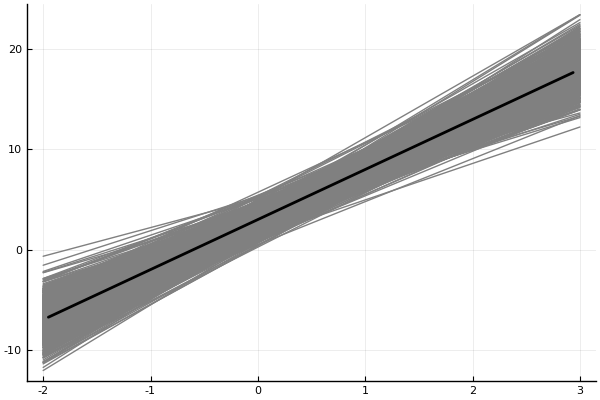

In [155]:
# 100 amostras
plot()
for t = 1:1000
    y = β[1] .+ β[2] * x + randn(n) * σ * 10
    X = [ones(n) x]
    βhat = (X' * X) \ (X' * y)
    yhat = X * βhat
    plot!(x, yhat, c=:gray)
end
plot!(x -> β[1] + β[2] * x, -2, 3, c=:black, lw=2, leg=false)

## Forma matricial

Com os vetores $\overline{\phi}_1, \dots, \overline{\phi}$, podemos montar a matriz
$$ A = [\overline{\phi}_1 \cdots \overline{\phi}_n]. $$
Com essa matriz, podemos ver que $ A^TA = M$ e que $A^Ty = c$.
Ou seja, o sistema que queremos resolver é, na verdade
$$ A^TA\alpha = A^Tb, $$
ou seja, $A^T(A\alpha - b) = 0$.

Isso quer dizer que o sistema normal tem alguma relação com o sistema sobre-determinado $A\alpha = b$.
De fato, se pensarmos novamente no problema de minimizar aquela $E(\alpha)$, cada termo dentro do somatório é
uma linha de $A\alpha - b$.
Em outras palavras,
$$ E(\alpha) = \frac{1}{2}\sum_{i=1}^m (b - A\alpha)_i^2
= \frac{1}{2}\Vert A\alpha - b\Vert^2. $$

De fato, se calculamos $\nabla E(\alpha) = 0$, obtemos as equações normais.
Isso generaliza o problema de quadrados mínimos.
Esse problema aparece com frequência em outros contextos, e é bastante importante sabermos resolvê-lo eficientemente. Infelizmente, nesta disciplina, não teremos tempo de aprender como fazer isso de maneira eficiente.

Note ainda que o resíduo é $r = b - Ax$.

# Quadrados Mínimos Não-Lineares

Até agora supomos que o conjunto de dados $(x_i,y_i), i=1,\dots,m$
pode ser representado por uma função
$$f(x) = \alpha_1\phi_1(x) + \dots + \alpha_n\phi_n(x),$$
onde $\alpha$ são as incógnitas que buscamos.

No entanto, isso nem sempre é possível. Muitas vezes não temos uma forma para $f$, sabemos
apenas que depende de $\alpha$.

Um exemplo importante é o da lei de resfriamento. Se um objeto é deixado num ambiente com temperatura $T_a$, ocorrendo apenas troca de temperatura com o ambiente, o objeto pode ter sua temperatura modelada por
$$ T(t) = T_a + \alpha_1 e^{\alpha_2 t}, $$
onde sabemos que $\alpha_2 < 0$ pois $T(t) \rightarrow T_a$ quando $t \to \infty$.

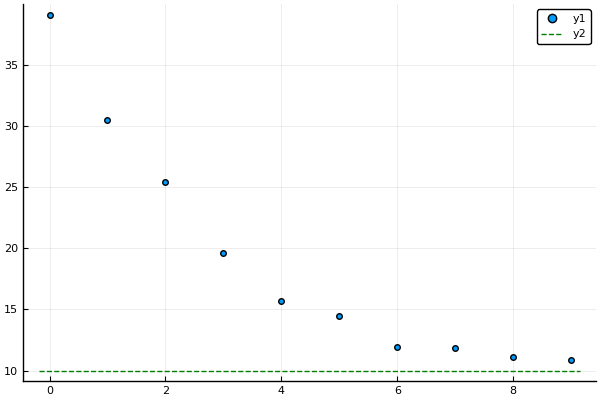

In [73]:
# Exemplo
Ta = 10
T = [39.1262; 30.5367; 25.4514; 19.6129; 15.6515; 14.4767; 11.9281; 11.8655; 11.0895; 10.8207]
t = [0.0; 1.0; 2.0; 3.0; 4.0; 5.0; 6.0; 7.0; 8.0; 9.0]
scatter(t, T)
plot!(t->Ta, c=:green, l=:dash)

De uma maneira geral, podemos considerar um modelo $\Phi(\alpha,x) = \alpha_1 \phi_1(x) + \dots + \alpha_n \phi_n(x)$ e considerar a minimização de
$$E(\alpha) = \sum_{i=1}^m [y_i - \Phi(\alpha,x_i)]^2.$$
No entanto, esse problema é bem mais complicado que o que vimos aqui.

Felizmente, alguns casos podem ser **linearizados**.

## Quadrados Mínimos Não-Lineares Linearizável

Note o seguinte gráfico.

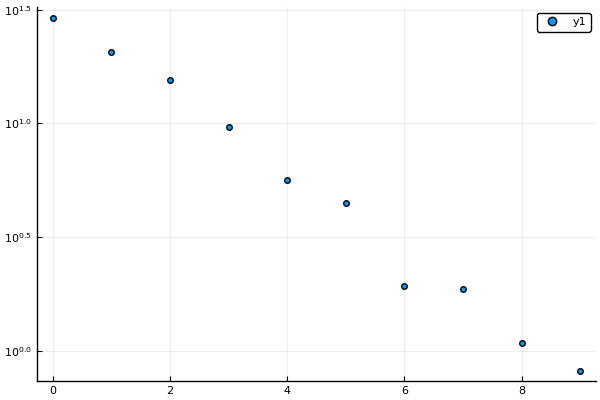

In [74]:
scatter(t, T .- Ta, yaxis=:log)

Ou seja, embora os dados $(t_i,T_i)$ não possam ser aproximados por uma reta, os dados $(t_i,\ln (T_i - T_a))$ podem.

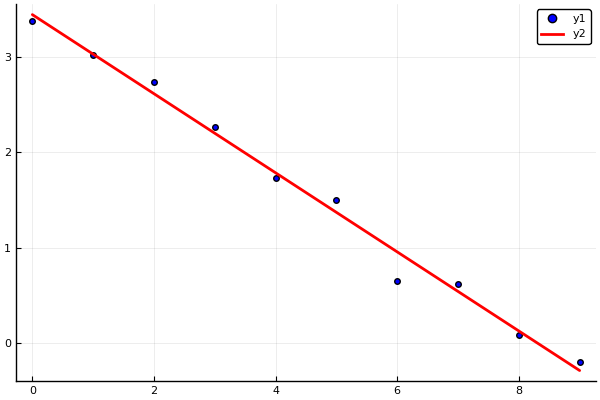

In [75]:
A = [ones(10) t]
α = (A'*A)\(A'*log.(T .- Ta))
scatter(t, log.(T .- Ta), c=:blue)
plot!(t, α[1] .+ α[2] * t, c=:red, lw=2)

Desse modo, estamos aproximando $\ln(T_i - T_a) \approx \alpha_1 + \alpha_2 t_i$, de modo que
$$T(t) \approx T_a + e^{\alpha_1 + \alpha_2 t_i}  = T_a + \beta_1 e^{\alpha_2 t_i}, $$
onde $\beta_1 = e^{\alpha_1}$.

Mas se $\alpha_1 + \alpha_2 x_i \approx \log y_i$, então $y_i \approx e^{\alpha_1 + \alpha_2 x_i}$.

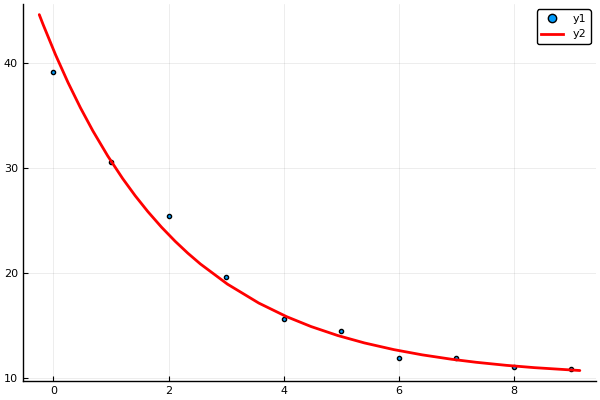

In [76]:
scatter(t, T, ms=3)
plot!(t->Ta + exp.(α[1] + α[2] * t), c=:red, lw=2)

De fato, esse modelo parece ajustar muito bem os dados.

Alguns dos modelos que podem ser linearizados estão abaixo:
$$ f(x) = \alpha_1e^{\alpha_2 x} $$
$$ f(x) = \frac{1}{\alpha_1 + \alpha_2 x} $$
$$ f(x) = \alpha_1 x^{\alpha_2} $$

Por exemplo, no primeiro caso $f(x) = \alpha_1e^{\alpha_x 2}$, se $y_i \approx f(x_i)$,
então $\ln y_i \approx \ln f(x_i)$.
Mas
$$ \ln f(x) = \ln \alpha_1 + \alpha_2 x. $$

Isso quer dizer que $g(x) = \beta_1 + \beta_2 x$ é um modelo linear para
$(x_i,\ln y_i), i=1,\dots,m$.
Podemos resolver o problema com o que já foi implementado, por exemplo, e
depois obter $\alpha_1 = e^{\beta_1}$ e $\alpha_2 = \beta_2$.

No caso $f(x) = \alpha_1x^{\alpha_2}$, a transformação também é $\ln f(x)$, obtendo
$$ \ln f(x) = \ln \alpha_1 + \alpha_2\ln x, $$
e aí $g(x) = \beta_1 + \beta_2\ln x$ é um modelo para $(x_i,\ln y_i)$, ou
$h(x) = \beta_1 + \beta_2x$ é um modelo polinomial para $(\ln x_i,\ln y_i)$.

No caso $f(x) = \dfrac{1}{\alpha_1 + \alpha_2 x}$, a transformação é $\dfrac{1}{f(x)}$.

A pergunta nesses casos é, tendo os dados, como saber qual a linearização?
Nesses casos, uma alternativa é tentar os gráficos das modificações.
Além disso, algumas coisas proíbem alguns modelos. Em particular, se $x$ é negativo, então $\log(x)$ é proibido. Se $y$ é negativo, então $\log(y)$ é negativo.

In [77]:
x = t
y = T .- Ta

10-element Array{Float64,1}:
 29.126199999999997 
 20.5367            
 15.4514            
  9.6129            
  5.6515            
  4.476699999999999 
  1.9281000000000006
  1.8655000000000008
  1.0894999999999992
  0.8207000000000004

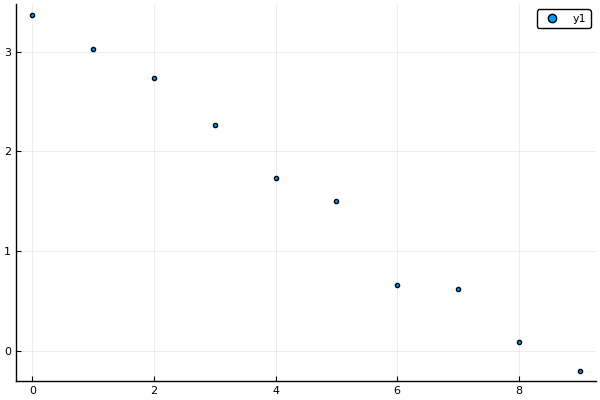

In [78]:
# Dados anteriores, do tipo αeᵝˣ
scatter(x, log.(y), ms=3)

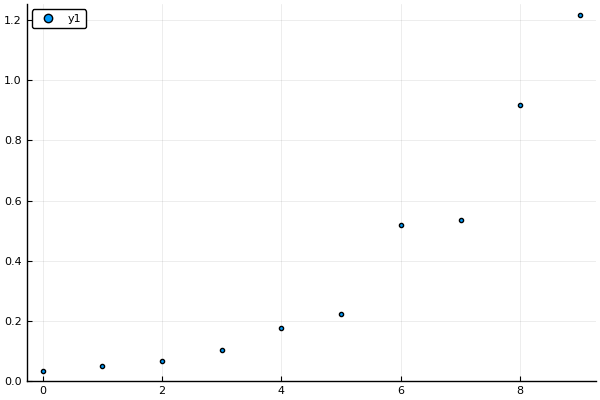

In [79]:
scatter(x, 1 ./ y, ms=3) # Ruim

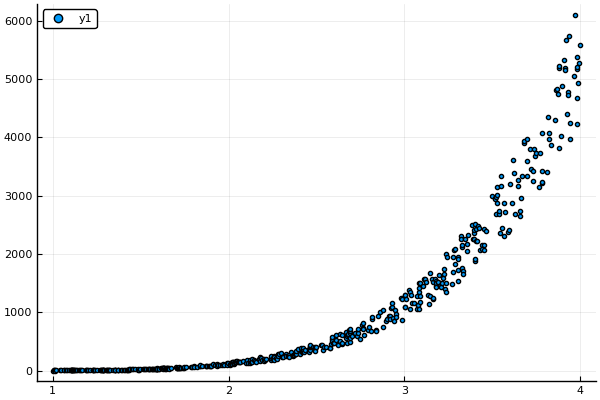

In [144]:
x = sort(rand(500)*3 .+ 1)
y = 2.1*x.^(5.5) .* (1 .+ rand(500)*0.5)
scatter(x, y, ms=3)

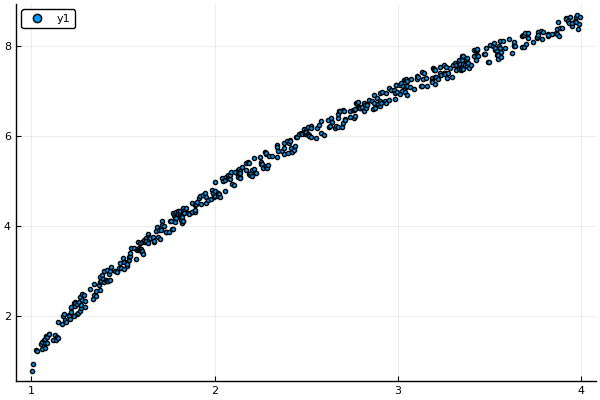

In [81]:
scatter(x, log.(y), ms=3)

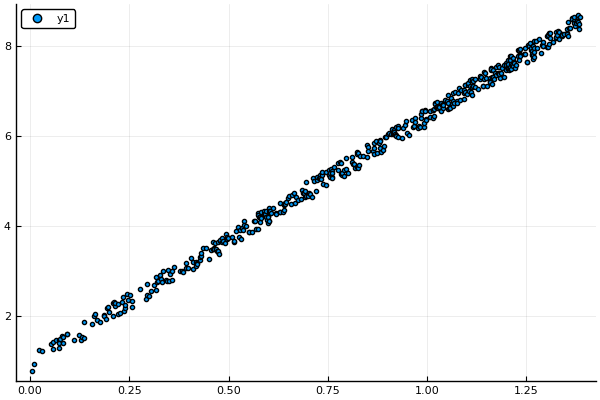

In [82]:
scatter(log.(x), log.(y), ms=3)

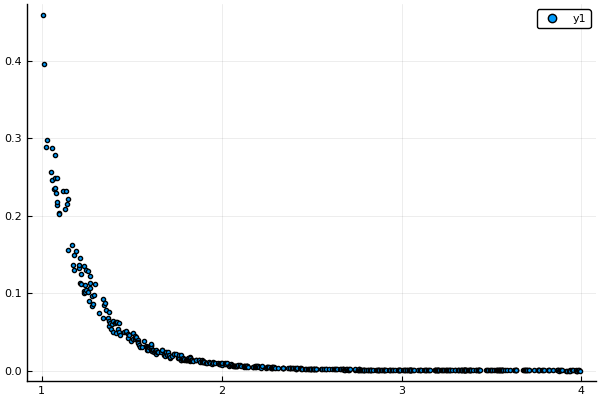

In [83]:
scatter(x, 1 ./ y, ms=3)

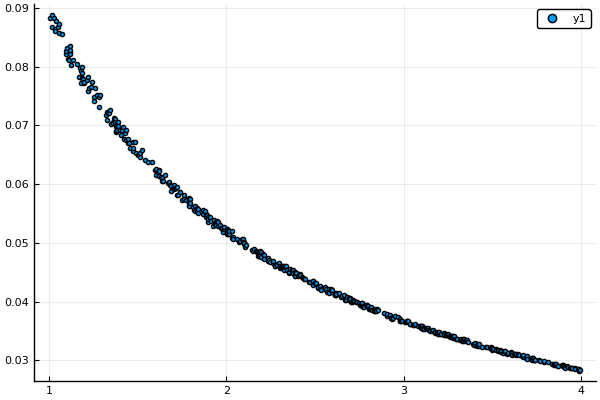

In [84]:
x = sort(rand(500)*3 .+ 1)
y = 1 ./ (3 .+ 8*x + rand(500)*0.5)
scatter(x, y, ms=3)

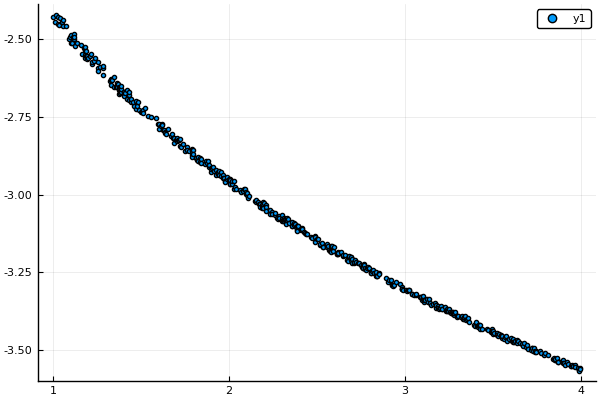

In [85]:
scatter(x, log.(y), ms=3)

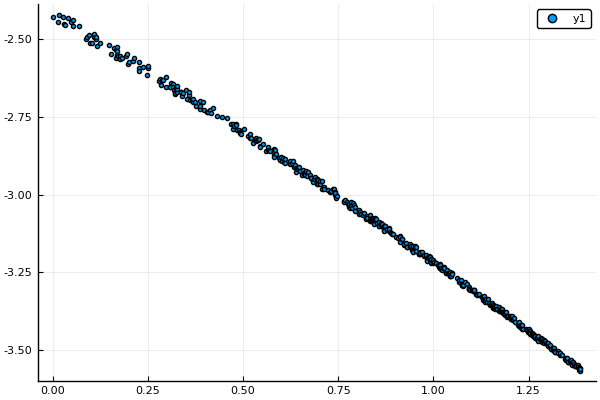

In [86]:
scatter(log.(x), log.(y), ms=3)

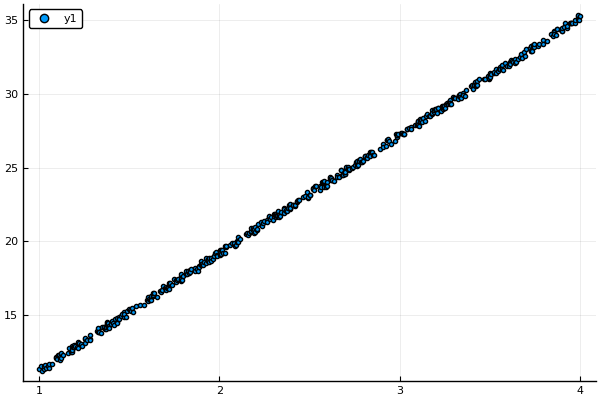

In [87]:
scatter(x, 1 ./ y, ms=3)

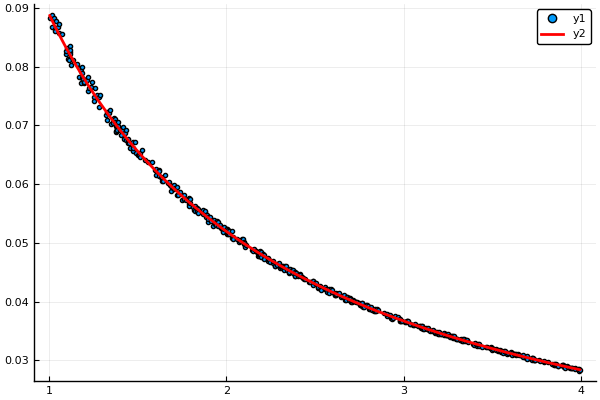

In [88]:
A = [ones(500) x]
α = (A'*A)\(A'*(1 ./ y))

scatter(x, y, ms=3)
plot!(x, 1 ./ (α[1] .+ α[2]*x), c=:red, lw=2)

## Álgebra linear do problema de quadrados mínimos

Como vimos, estamos minimizando $\Vert Ax -b \Vert$. Isso pode ser visto como $\min \Vert y -x\Vert$ para $y \in Im(A)$. Ou seja, estamos calculando a projeção de $b$ na imagem de $A$.

Se $b = y + z$, com $y \in Im(A)$, então $z \perp Im(A)$. Mas, $Im(A)^{\perp} = Nu(A^T)$, de modo que $z \in Nu(A^T)$. Em outras palavras, $A^Tz = 0$. Como $y \in Im(A)$, então existe $u$ tal que $y = Au$. Daí, temos
$b = Au + z$ com $A^Tz = 0$.
Sendo assim,
$$\Vert Ax - b\Vert^2
= \Vert Ax - Au - z\Vert^2
= \Vert A(x - u) - z\Vert^2
= \Vert A(x - u)\Vert^2 + \Vert z\Vert^2,
$$
onde a última igualdade segue de ortogonalidade.
Portanto, a escolha que minimiza $\Vert Ax - b\Vert$, é $x = u$, já que $\Vert z\Vert$ não pode ser modificado pela escolha de $x$. Nisso, temos
$$r = b - Ax = Au + z - Au = z,$$
isto é, $r$ é a projeção ortogonal de $b$ no núcleo de $A^T$.

Note que, apesar de intepretação da projeção ortogonal, a solução $x$ é o coeficiente dos vetores que gera a projeção.

## Exercícios

- Faça os exercícios do capítulo 6 do livro Cálculo Numérico de Ruggiero e Lopes.

- Mostre que a matriz $A^TA$ tem inversa se as colunas de $A$ forem linearmente independentes. Dica: Mostre que $\mathcal{N}(A) = \mathcal{N}(A^TA)$.

- Modele os dados abaixo,
   - Utilizando o modelo $\varphi(x) = \alpha_1 + \alpha_2 \sin(2\pi t) + \alpha_3 \cos(2\pi t)$;
   - Utilizando o modelo $\varphi(x) = \alpha_1 + \alpha_2 \sin(2\pi t) + \alpha_3 \cos(2\pi t) + \alpha_4 \sin(4\pi t) + \alpha_5 \cos(4\pi t)$;
   - Compare os dois ajustes.
   
| $x$ | 0.000 | 0.125 | 0.250 |  0.375 |  0.500 | 0.625 | 0.750 | 0.875 | 1.000 |
|-|
| $y$ | 7.500 | 6.200 | 2.700 | -0.800 | -0.500 | 1.600 | 4.100 | 6.500 | 7.200 |

- [Nesta página](https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Tabela_clim%C3%A1tica_de_Curitiba) encontram-se as temperaturas médias de Curitiba de vários anos. Ajuste esses dados.

- O problema de quadrados mínimos $\min \frac{1}{2}\Vert Ax - b\Vert^2$ pode ser visualizado como a projeção ortogonal de $b$ na imagem de $A$.
  - O que acontece se $b$ está na imagem de $A$?
  - O que acontece se $b$ é ortogonal à imagem de $A$?
  - Qual seria o problema de quadrados mínimos para se encontrar a projeção ortogonal de $b$ na imagem de $A^T$?
  - Como $Im(A)$ é um subespaço, podemos escrever $b$ como a soma de um elemento de $Im(A)$ e um elemento ortogonal à $Im(A)$. Mostre quem é a solução e o resíduo do problema de quadrados mínimos em função dessa separação d

- Usando quadrados mínimos, encontre a projeção ortogonal de um vetor $v$ sobre outro vetor $w$.
- O que acontece se a matriz $A$ tiver colunas ortogonais?
- O que acontece se a matriz $A$ não tiver colunas linearmente independentes?

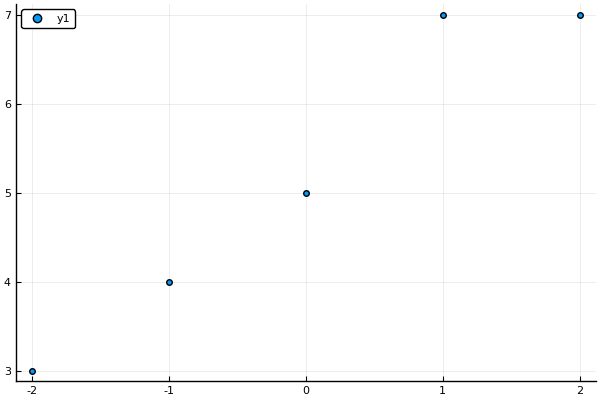

In [89]:
x = [-2; -1; 0; 1; 2.0]
y = [3; 4; 5; 7; 7.0]
scatter(x, y)

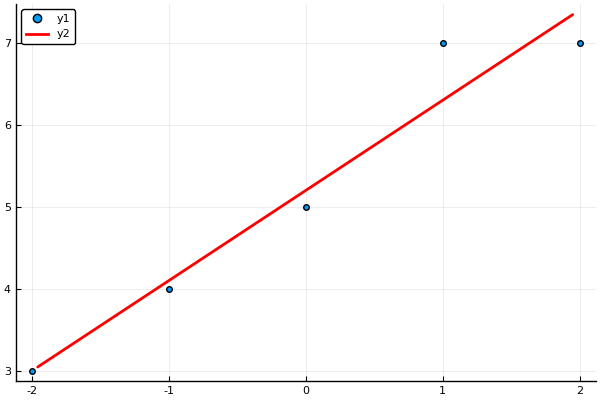

In [90]:
# Q1: ajuste com um modelo linear
X = [ones(5) x]
βlin = (X' * X) \ (X' * y)
scatter(x, y)
plot!(x -> βlin[1] + βlin[2] * x, -2, 2, c=:red, lw=2)

In [91]:
# SQR
r = y - X * βlin
sqr = norm(r)^2 # ∑rᵢ²

0.6999999999999993

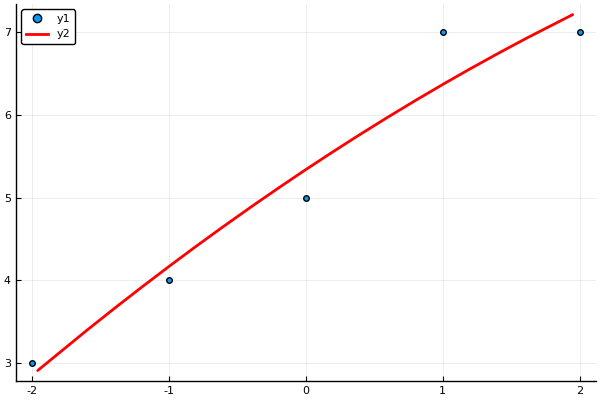

In [92]:
# Q2: Ajuste com um modelo quadrático
X = [ones(5) x x.^2]
βquad = (X' * X) \ (X' * y)
scatter(x, y)
plot!(x -> βquad[1] + βquad[2] * x + βquad[3] * x^2, -2, 2, c=:red, lw=2)

In [93]:
# SQR
r = y - X * βquad
sqr = norm(r)^2 # ∑rᵢ²

0.6285714285714292

In [94]:
# Q3: Tome um ponto novo: (0.5, 6). Qual modelo é melhor para esse ponto?
(6 - (βlin[1] + βlin[2] * 0.5))^2 # (yᵢ - β₀ - β₁xᵢ)²

0.0625

In [95]:
(6 - (βquad[1] + βquad[2] * 0.5 + βquad[3] * 0.5^2))^2 #  (yᵢ - β₀ - β₁xᵢ - β₂xᵢ²)²

0.015625